### Trabalho de Conclusão de Curso
### Pós Graduação Ciência de Dados e Inteligência Artificial - PUCRS

### UTILIZANDO TÉCNICAS DE MACHINE LEARNING NA PRECIFICAÇÃO DE TARIFAS DE ARRECADAÇÃO TRIBUTÁRIA NO BRASIL

### Michel Dourado

### Parte 3 - pré-processamento

In [1]:
# Import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

### Pré processamento dos dados

In [2]:
#Vamos continuar trabalhando com o dataframe do pandas gerando após os tratamentos realizados com base na análise exploratória
dados = pd.read_csv('df_pd_analise_exploratoria_vf.csv')

In [3]:
dados.shape

(3360, 9)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3360 non-null   int64  
 1   Cod_Tipo_Cart_Rel          3360 non-null   int64  
 2   UF                         3360 non-null   object 
 3   Esfera                     3360 non-null   object 
 4   Quantidade_media_guias     3360 non-null   int64  
 5   Volume_medio_arrecadado    3360 non-null   float64
 6   Volume_medio_tarifas       3360 non-null   float64
 7   Margem_contribuicao_media  3360 non-null   float64
 8   Tarifa_media               3360 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 236.4+ KB


In [6]:
dados.Cod_Tipo_Cart_Rel = dados.Cod_Tipo_Cart_Rel.astype('object')
dados.ID               = dados.ID.astype('object')

In [7]:
dados.columns

Index(['ID', 'Cod_Tipo_Cart_Rel', 'UF', 'Esfera', 'Quantidade_media_guias',
       'Volume_medio_arrecadado', 'Volume_medio_tarifas',
       'Margem_contribuicao_media', 'Tarifa_media'],
      dtype='object')

In [8]:
dados = dados[['UF','Esfera','Quantidade_media_guias','Volume_medio_arrecadado','Tarifa_media']]
#dados = dados[['Quantidade_media_guias','Volume_medio_arrecadado','Tarifa_media']]

In [9]:
dados.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Tarifa_media
count,3360.00,3360.00,3360.00
mean,4653.67,108193.53,0.87
std,8272.84,1494175.65,0.66
min,1.00,0.00,0.01
25%,537.25,1385.00,0.41
50%,1587.50,7396.09,0.74
75%,5200.25,25980.25,1.15
max,214686.00,69478165.00,4.60


array([[<Axes: title={'center': 'Tarifa Média'}>,
        <Axes: title={'center': 'log(Tarifa Média + 1)'}>]], dtype=object)

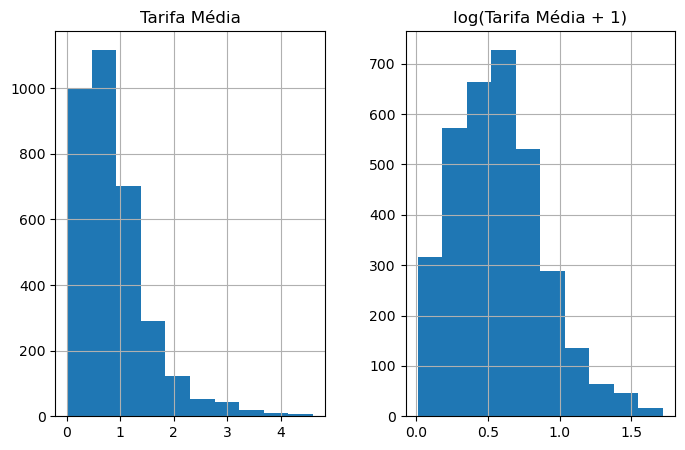

In [10]:
# Pré-Processamento dos dados
new_tfa = {"Tarifa Média":dados["Tarifa_media"], "log(Tarifa Média + 1)":np.log1p(dados["Tarifa_media"])}
tarifas = pd.DataFrame(new_tfa)
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
tarifas.hist()

In [11]:
# Aplicação das transformações a todos os dados
numeric_feats = dados.dtypes[dados.dtypes != "object"].index
dados[numeric_feats] = np.log1p(dados[numeric_feats])

In [12]:
dados.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Tarifa_media
count,3360.00,3360.00,3360.00
mean,7.32,8.14,0.58
std,1.71,3.36,0.31
min,0.69,0.00,0.01
25%,6.29,7.23,0.34
50%,7.37,8.91,0.55
75%,8.56,10.17,0.77
max,12.28,18.06,1.72


In [13]:
outlier = dados.Tarifa_media.std() * 3
outlier

0.9338726162446245

In [14]:
dados =dados[dados.Tarifa_media<=outlier]

In [15]:
dados.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Tarifa_media
count,2943.00,2943.00,2943.00
mean,7.42,8.24,0.49
std,1.59,3.23,0.23
min,0.69,0.00,0.01
25%,6.41,7.38,0.31
50%,7.45,8.97,0.50
75%,8.59,10.18,0.68
max,11.82,18.06,0.93


Text(0.5, 1.0, 'Histograma da Tarifa Média')

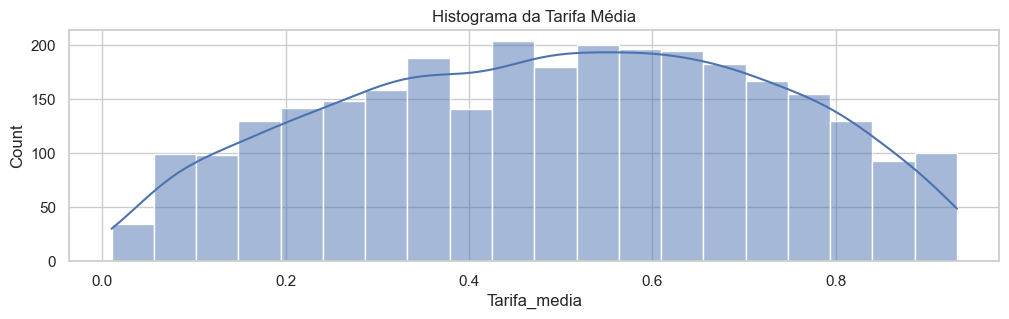

In [16]:
# Histograma da tarifa média após transformação logaritmica e exclusão de outliers
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 3))
fig_tfa = sns.histplot(dados['Tarifa_media'], kde = True, bins = 20)
fig_tfa.set_title('Histograma da Tarifa Média')

Text(0.5, 1.0, 'Histograma da Quantidade_media_guias')

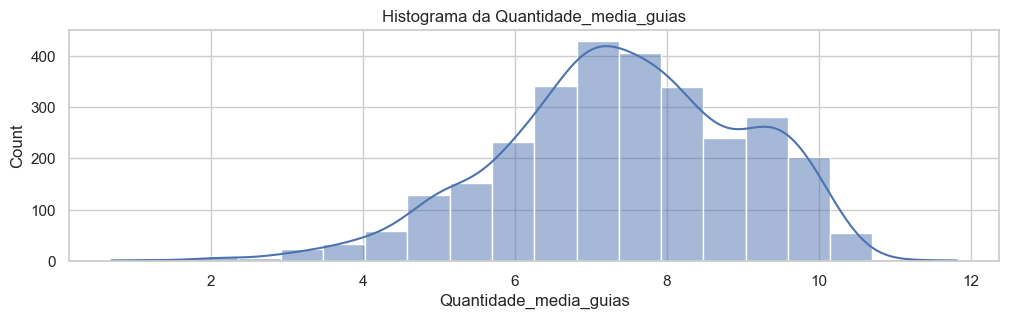

In [17]:
# Histograma da quatidade média de guias após transformação logaritmica e exclusão de outliers
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 3))
fig_qtde = sns.histplot(dados['Quantidade_media_guias'], kde = True, bins = 20)
fig_qtde.set_title('Histograma da Quantidade_media_guias')

Text(0.5, 1.0, 'Histograma do Volume_medio_arrecadado')

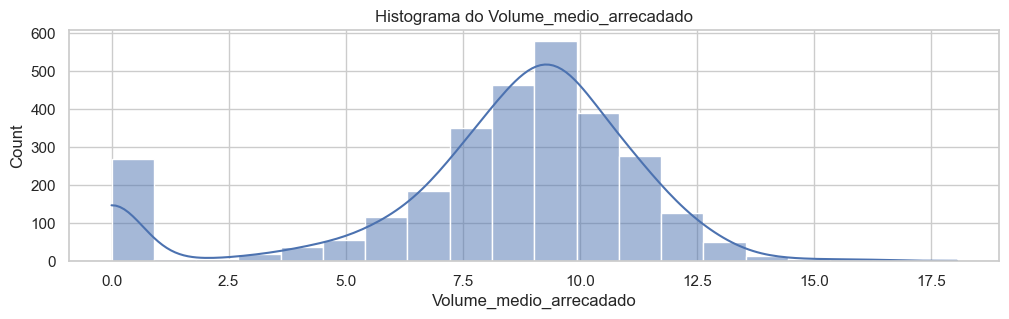

In [18]:
# Histograma do volume médio arrecadado após transformação logaritmica e exclusão de outliers
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 3))
fig_vol = sns.histplot(dados['Volume_medio_arrecadado'], kde = True, bins = 20)
fig_vol.set_title('Histograma do Volume_medio_arrecadado')

In [19]:
#gerando dados de treino
df_treino = dados.sample(frac = 0.8, random_state = 133)

In [20]:
#selecionando tudo que não está no dataset de treino e atribuindo ao dataset de teste
df_teste = dados.loc[~dados.index.isin(df_treino.index)]

In [21]:
#shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(2354, 5)
(589, 5)


In [22]:
dados = pd.get_dummies(dados)

In [23]:
#Analisando a correlação das variáveis com a variável target Tarifa_media
dados.corr()['Tarifa_media']

Quantidade_media_guias    -0.27
Volume_medio_arrecadado    0.05
Tarifa_media               1.00
UF_AC                     -0.02
UF_AL                      0.05
UF_AM                      0.02
UF_AP                      0.01
UF_BA                      0.07
UF_CE                      0.07
UF_ES                     -0.01
UF_GO                      0.08
UF_MA                      0.08
UF_MG                     -0.11
UF_MS                     -0.00
UF_MT                     -0.01
UF_PA                      0.03
UF_PB                     -0.02
UF_PE                      0.05
UF_PI                      0.06
UF_PR                     -0.04
UF_RJ                      0.03
UF_RN                      0.03
UF_RO                      0.03
UF_RR                     -0.00
UF_RS                     -0.05
UF_SC                     -0.01
UF_SE                      0.00
UF_SP                     -0.15
UF_TO                      0.06
Esfera_ESTADUAL           -0.01
Esfera_MUNICIPAL           0.01
Name: Ta

In [24]:
dados.shape

(2943, 31)

In [26]:
dados.to_csv('df_pd_pre_processamento_vf.csv', index=False)

# Fim